In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dataset=pd.read_csv(filepath, header =,names=, na_values= , parse_dates=[[0,1,2]]) 

df=pd.read_csv('C:/Users/velth/Desktop/Springboard/datasets/hmeq.csv')
#print(df)

#inital review of data with info() and head () methods
df.head()
df.info()
#print (type(df))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [3]:
# Frequency counts on categorical columns JOB and REASON to view different job types  

print(df.JOB.value_counts(dropna=False))
print(df.REASON.value_counts(dropna=False))

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64
DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


In [4]:
# CONVERTING DATA TYPES of COLUMNS


# Converting object type to category for columns 'REASON' and 'JOB' and 'BAD'

df['JOB'] =df['JOB'].astype('category')
df['REASON']=df['REASON'].astype('category')
df['BAD']=df['BAD'].astype('category')

# Imputing values of the columns before converting to int from float

df.YOJ= df.YOJ.fillna(df.YOJ.mean())
df.CLAGE=df.CLAGE.fillna(df.CLAGE.mean())
df.CLNO =df.CLNO.fillna(df.CLNO.mean())

# Converting data type of columns from Float to Integer

df.YOJ= df.YOJ.astype(int)
df.CLNO =df.CLNO.astype(int)
df.CLAGE=df.CLAGE.astype(int)

# df['CLAGE']=pd.to_numeric(df['CLAGE'],errors='ignore',downcast='signed')

df.info() # Shows the columns coverted to INT 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null category
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null category
JOB        5681 non-null category
YOJ        5960 non-null int32
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5960 non-null int32
NINQ       5450 non-null float64
CLNO       5960 non-null int32
DEBTINC    4693 non-null float64
dtypes: category(3), float64(6), int32(3), int64(1)
memory usage: 413.4 KB


In [5]:
# Removing any duplicate values in the data if existed 

df=df.drop_duplicates()
#print(df)  # There were no duplicate values in the data

# Getting the count of the missing values

df_missing=df.dropna()
df_missing.info()

# Almost 40 % of the data wil be lost if we drop all the missing values 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3585 non-null category
LOAN       3585 non-null int64
MORTDUE    3585 non-null float64
VALUE      3585 non-null float64
REASON     3585 non-null category
JOB        3585 non-null category
YOJ        3585 non-null int32
DEROG      3585 non-null float64
DELINQ     3585 non-null float64
CLAGE      3585 non-null int32
NINQ       3585 non-null float64
CLNO       3585 non-null int32
DEBTINC    3585 non-null float64
dtypes: category(3), float64(6), int32(3), int64(1)
memory usage: 276.7 KB


In [6]:
# REPLACING  or IMPUTING MISSING VALUES

# Most common category is replaced for missing values of categorical columns

df.JOB=df.JOB.fillna('Other')
df.REASON=df.REASON.fillna('DebtCon')

# Mean of the values are filled for missing values of other columns

df.MORTDUE=df.MORTDUE.fillna(df.MORTDUE.mean())
df.VALUE=df.VALUE.fillna(df.VALUE.mean())
df.DEBTINC =df.DEBTINC.fillna(df.DEBTINC.mean())

df.DEROG.value_counts() # since 76% of the values are 0 , it will be imputed for NA 
df.DEROG=df.DEROG.fillna(0)

df.DELINQ.value_counts() # since 70% of values are 0,it will be imputed for NA 
df.DELINQ=df.DELINQ.fillna(0)

df.NINQ.value_counts(dropna=False) # since 42% of values are 0,it will be imputed for NA 

df.NINQ=df.NINQ.fillna(0)

df.isnull().sum() # Verified that there are no null values


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

count    5959.000000
mean      179.091290
std        82.580906
min         0.000000
25%       117.000000
50%       178.000000
75%       227.000000
max      1154.000000
Name: CLAGE, dtype: float64
count    5959.000000
mean        8.826481
std         7.255013
min         0.000000
25%         3.000000
50%         8.000000
75%        12.000000
max        41.000000
Name: YOJ, dtype: float64
count      5959.000000
mean     101766.645662
std       56844.065933
min        8000.000000
25%       66488.000000
50%       90000.000000
75%      118970.500000
max      855909.000000
Name: VALUE, dtype: float64
count    5959.000000
mean       33.778837
std         7.632899
min         0.524499
25%        30.757681
50%        33.779915
75%        37.947558
max       203.312149
Name: DEBTINC, dtype: float64


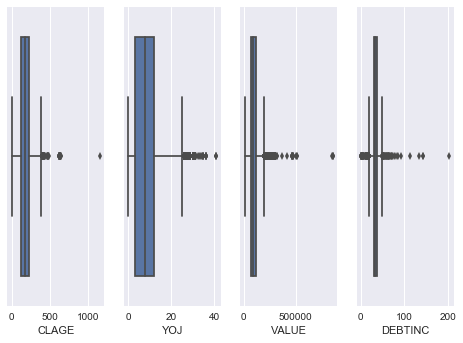

In [33]:
# IDENTIFYING  OUTLIERS

# Reviewing columns to find outliers  , CLNO: Number of credit lines

#print (df.CLNO.describe())  
#print (df.LOAN.describe())

# BOX PLOTS TO FIND OUTLIERS

f, axes = plt.subplots(1, 4)
import seaborn as sns
sns.boxplot(x=df.CLAGE, ax=axes[0])
sns.boxplot(x=df.YOJ, ax=axes[1])
sns.boxplot(x=df.VALUE, ax=axes[2])
sns.boxplot(x=df.DEBTINC,ax=axes[3])

print (df.CLAGE.describe())

# We found the outlier value 1168 months( or 97 years) which is logically incorrect for the age of oldest credit line.


print(df.YOJ.describe())

# Though value 41 looks as outlier, the value is logical and hence will not be removed from data

print (df.VALUE.describe())

# Again 855909 is logical and  hence will not be removed from data

print (df.DEBTINC.describe())

# The value 203 is defintely an incorrect value for the DEBTINC(debt to income ratio )



In [39]:
# Removing the outliers

df.loc[df['DEBTINC']== 203.312149]
df.loc[df['CLAGE']==1168.000000]

# Delete these rows from dataFrame


CLAGE_index = df[ df['CLAGE']==1168.000000 ].index
df.drop(CLAGE_index , inplace=True)


DEBTINC_index=df[df['DEBTINC']==203.312149].index
df.drop(DEBTINC_index , inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5959 non-null category
LOAN       5959 non-null int64
MORTDUE    5959 non-null float64
VALUE      5959 non-null float64
REASON     5959 non-null category
JOB        5959 non-null category
YOJ        5959 non-null int32
DEROG      5959 non-null float64
DELINQ     5959 non-null float64
CLAGE      5959 non-null int32
NINQ       5959 non-null float64
CLNO       5959 non-null int32
DEBTINC    5959 non-null int32
dtypes: category(3), float64(5), int32(4), int64(1)
memory usage: 436.5 KB
